## Data Acquisition

### Primary Data Sources

**1. Syracuse Open Data Portal**
- **Source:** data.syr.gov (City of Syracuse)
- **Acquisition Date:** December 2024
- **Method:** Direct CSV/GeoJSON download
- **Datasets Acquired:**
  - Code Violations (n=137,663 records, 2017-2025)
  - Rental Registry (n=~10,000 properties)
  - Neighborhood Boundaries (n=50 neighborhoods, GeoJSON format)

**2. US Census Bureau**
- **Source:** American Community Survey 5-Year Estimates (2023)
- **Acquisition Date:** December 2024
- **Method:** API access via tidycensus R package
- **Geographic Level:** Census Tract (Onondaga County, NY)
- **Tables Acquired:**
  - DP03: Economic Characteristics (~70 tracts)
  - DP04: Housing Characteristics (~70 tracts)
- **API Endpoint:** https://api.census.gov/data/2023/acs/acs5/profile

- **Note:** Census data downloaded in R, then imported to Python for analysis

Census data was acquired using the tidycensus R package due to its specialized functionality for accessing Census Bureau APIs. Data was exported to CSV format for subsequent analysis in Python, which provides robust libraries for data manipulation (Pandas), statistical analysis (NumPy, SciPy), and visualization (Matplotlib, Seaborn).


# Phase 2: Data Acquisition and Exploration

## Data Cleaning and Filtering Approach

### Why Traditional Data Cleaning Doesn't Apply Here

Unlike typical data analysis projects that require cleaning missing values, fixing data types, and standardizing formats across entire datasets, **this project requires a domain-specific filtering approach**. Our goal is not to use all available data, but rather to **extract and analyze only the subset of records relevant to winter heating vulnerability**.

#### Key Differences from Traditional Cleaning:

**Traditional Approach:**
- Clean ALL missing values across ALL columns
- Standardize ALL categorical variables
- Fix data types for EVERY field
- Remove duplicates across entire dataset

**Our Approach:**
- **Filter first, clean later** - Extract only heating-related violations before addressing data quality
- **Ignore irrelevant columns** - Missing values in `Vacant`, `issued_to_zip`, etc. don't matter because we don't use those fields
- **Domain-specific classification** - Distinguish between space heating and water heating violations
- **Geographic aggregation** - Analyze at neighborhood level, not individual violation level

This approach is appropriate because:
1. We're conducting a **targeted analysis** of heating issues, not a comprehensive code violations study
2. The dataset contains 137,663 violations, but only ~1,647 are heating-related
3. Missing data in non-heating columns doesn't affect our analysis
4. We need **neighborhood-level insights**, not property-level details

---

## Code Violations Dataset: Heating Violations Analysis

### Dataset Overview

**Source:** Syracuse Open Data Portal (data.syr.gov)  
**Dataset:** Code Violations (Version 2)  
**Acquisition Date:** December 2024  
**Original Size:** 137,663 violation records (2017-2025)  
**File Format:** CSV

---

### Data Filtering Process

#### Step 1: Broad Keyword Search

We began with a comprehensive search for heating-related terms in the violation descriptions:

**Keywords Used:**
- heat, heating, furnace, boiler
- frozen, cold, temperature, hvac

**Initial Result:** ~2,000 potential heating violations

**Issue Identified:** This broad filter captured false positives such as:
- Refrigerator temperature violations (food safety, not heating)
- Hot water issues (ambiguous - could be plumbing or heating)
- HVAC mentions in non-heating contexts

---

#### Step 2: Refined Classification (Space Heating vs Water Heating)

To eliminate false positives and provide analytical clarity, we classified violations into two categories:

**Space Heating Violations:**
- Heat supply failures
- Unsafe heating appliances
- Furnace malfunctions
- Inadequate room temperature
- Unvented heaters

**Water Heating Violations:**
- Water heating facility failures
- Hot water supply issues

**Rationale for Including Water Heating:**
While water heating is not directly related to winter space heating, lack of hot water during winter months represents a significant hardship for vulnerable households. We include it as a **secondary indicator** but separate it analytically to maintain clarity about primary heating system failures.

**Final Result:** 1,647 heating-related violations
- Space Heating: 1,432 violations (87%)
- Water Heating: 215 violations (13%)

---

#### Step 3: Geographic Standardization

**Challenge:** 1,228 violations (0.89% of original dataset) had missing neighborhood assignments.

**Solution:**
- Labeled missing neighborhoods as "Unknown"
- These records are retained for citywide statistics but excluded from neighborhood-level analysis
- Future enhancement: Use SBL (property identifier) to geocode and assign neighborhoods

---

### Data Quality Assessment

#### Missing Values (Relevant Fields Only)

Since we're conducting a targeted analysis, we assessed data quality only for the fields used in our analysis:

| Field | Missing Values | Impact on Analysis |
|-------|----------------|-------------------|
| `violation` | 0 | No impact - required for filtering |
| `status_type_name` | 0 | No impact - used for open/closed classification |
| `violation_date` | 26,444 (19.2%) | Limits temporal analysis, but doesn't affect neighborhood aggregation |
| `Neighborhood` | 1,228 (0.89%) | Minor impact - labeled as "Unknown" |
| `complaint_address` | 169 (0.12%) | Minimal impact on unique address counts |

**Conclusion:** Data quality is sufficient for neighborhood-level risk analysis. Missing values exist but do not compromise our primary research question.

#### Temporal Coverage

**Date Range:** 2017-01-03 to 2025-12-12 (8+ years of data)  
**Violations by Status:**
- Open: 1,124 violations (68.2%)
- Closed: 523 violations (31.8%)

**Key Finding:** The high proportion of open violations (68%) indicates **ongoing, unresolved heating problems** across Syracuse neighborhoods.

---

### Analytical Approach: Neighborhood Aggregation

Rather than analyzing individual violations, we aggregated data to the **neighborhood level** to answer the question: *"Which neighborhoods have the most persistent and widespread heating problems?"*

#### Metrics Calculated per Neighborhood:

1. **Volume Metrics:**
   - Total heating violations (space + water)
   - Space heating violations only
   - Water heating violations only

2. **Breadth Metrics:**
   - Number of unique properties affected
   - Violations per address (concentration measure)

3. **Urgency Metrics:**
   - Open violations (current unresolved risk)
   - Closed violations (historical issues)
   - Open violation percentage

---

### Risk Scoring Methodology

We developed two complementary risk scores using min-max normalization (0-1 scale):

#### Historical Risk Score
**Formula:** (Total Violations Scaled + Unique Addresses Scaled) / 2

**Interpretation:** Has this neighborhood historically experienced widespread heating problems?
- Accounts for both volume and breadth of issues
- Higher score = more properties affected over time

#### Current Risk Score
**Formula:** Open Violations Scaled

**Interpretation:** Does this neighborhood have unresolved heating problems right now?
- Measures urgency and current need
- Higher score = more immediate intervention required

#### Risk Quadrant Classification

Neighborhoods were classified into four categories based on median thresholds:

- **High Historical / High Current** - Persistent, ongoing crisis (highest priority)
- **High Historical / Low Current** - Past problems, currently improved
- **Low Historical / High Current** - Emerging problem areas
- **Low Historical / Low Current** - Stable, low-risk neighborhoods

---

## Key Findings: Code Violations Analysis

### Finding 1: Northside Faces Severe Heating Crisis

**Northside neighborhood has 322 heating violations - nearly 2x more than any other neighborhood.**

Key Statistics:
- Total violations: 322 (19.5% of all heating violations citywide)
- Unique properties affected: 271
- Open violations: 213 (66% unresolved)
- Violations per address: 1.19

**Interpretation:** Northside has both the highest volume AND the highest number of affected properties, indicating a **widespread, systemic heating problem** rather than isolated incidents.

---

### Finding 2: Space Heating Dominates Winter Vulnerability

**87% of heating violations involve space heating systems (furnaces, heat supply), not water heating.**

Top 3 Space Heating Violation Types:
1. "Inadequate heat supply" (n=678)
2. "Unsafe heating appliance" (n=421)
3. "Furnace malfunction" (n=333)

**Implication:** Weatherization interventions should prioritize **furnace repair/replacement and heating system upgrades** over water heater improvements.

---

### Finding 3: Most Heating Problems Remain Unresolved

**68% of heating violations are currently open (unresolved), indicating ongoing risk.**

City-wide Status:
- Open violations: 1,124
- Closed violations: 523
- Open rate: 68.2%

**Policy Implication:** The city's code enforcement and violation resolution processes are not keeping pace with the rate of heating failures. This suggests either:
- Insufficient resources for enforcement
- Landlords unable or unwilling to make repairs
- Complex systemic issues requiring more than simple fixes

---

## Visualizations: Code Violations Analysis

### Visualization 1: Neighborhood Risk Quadrant Analysis


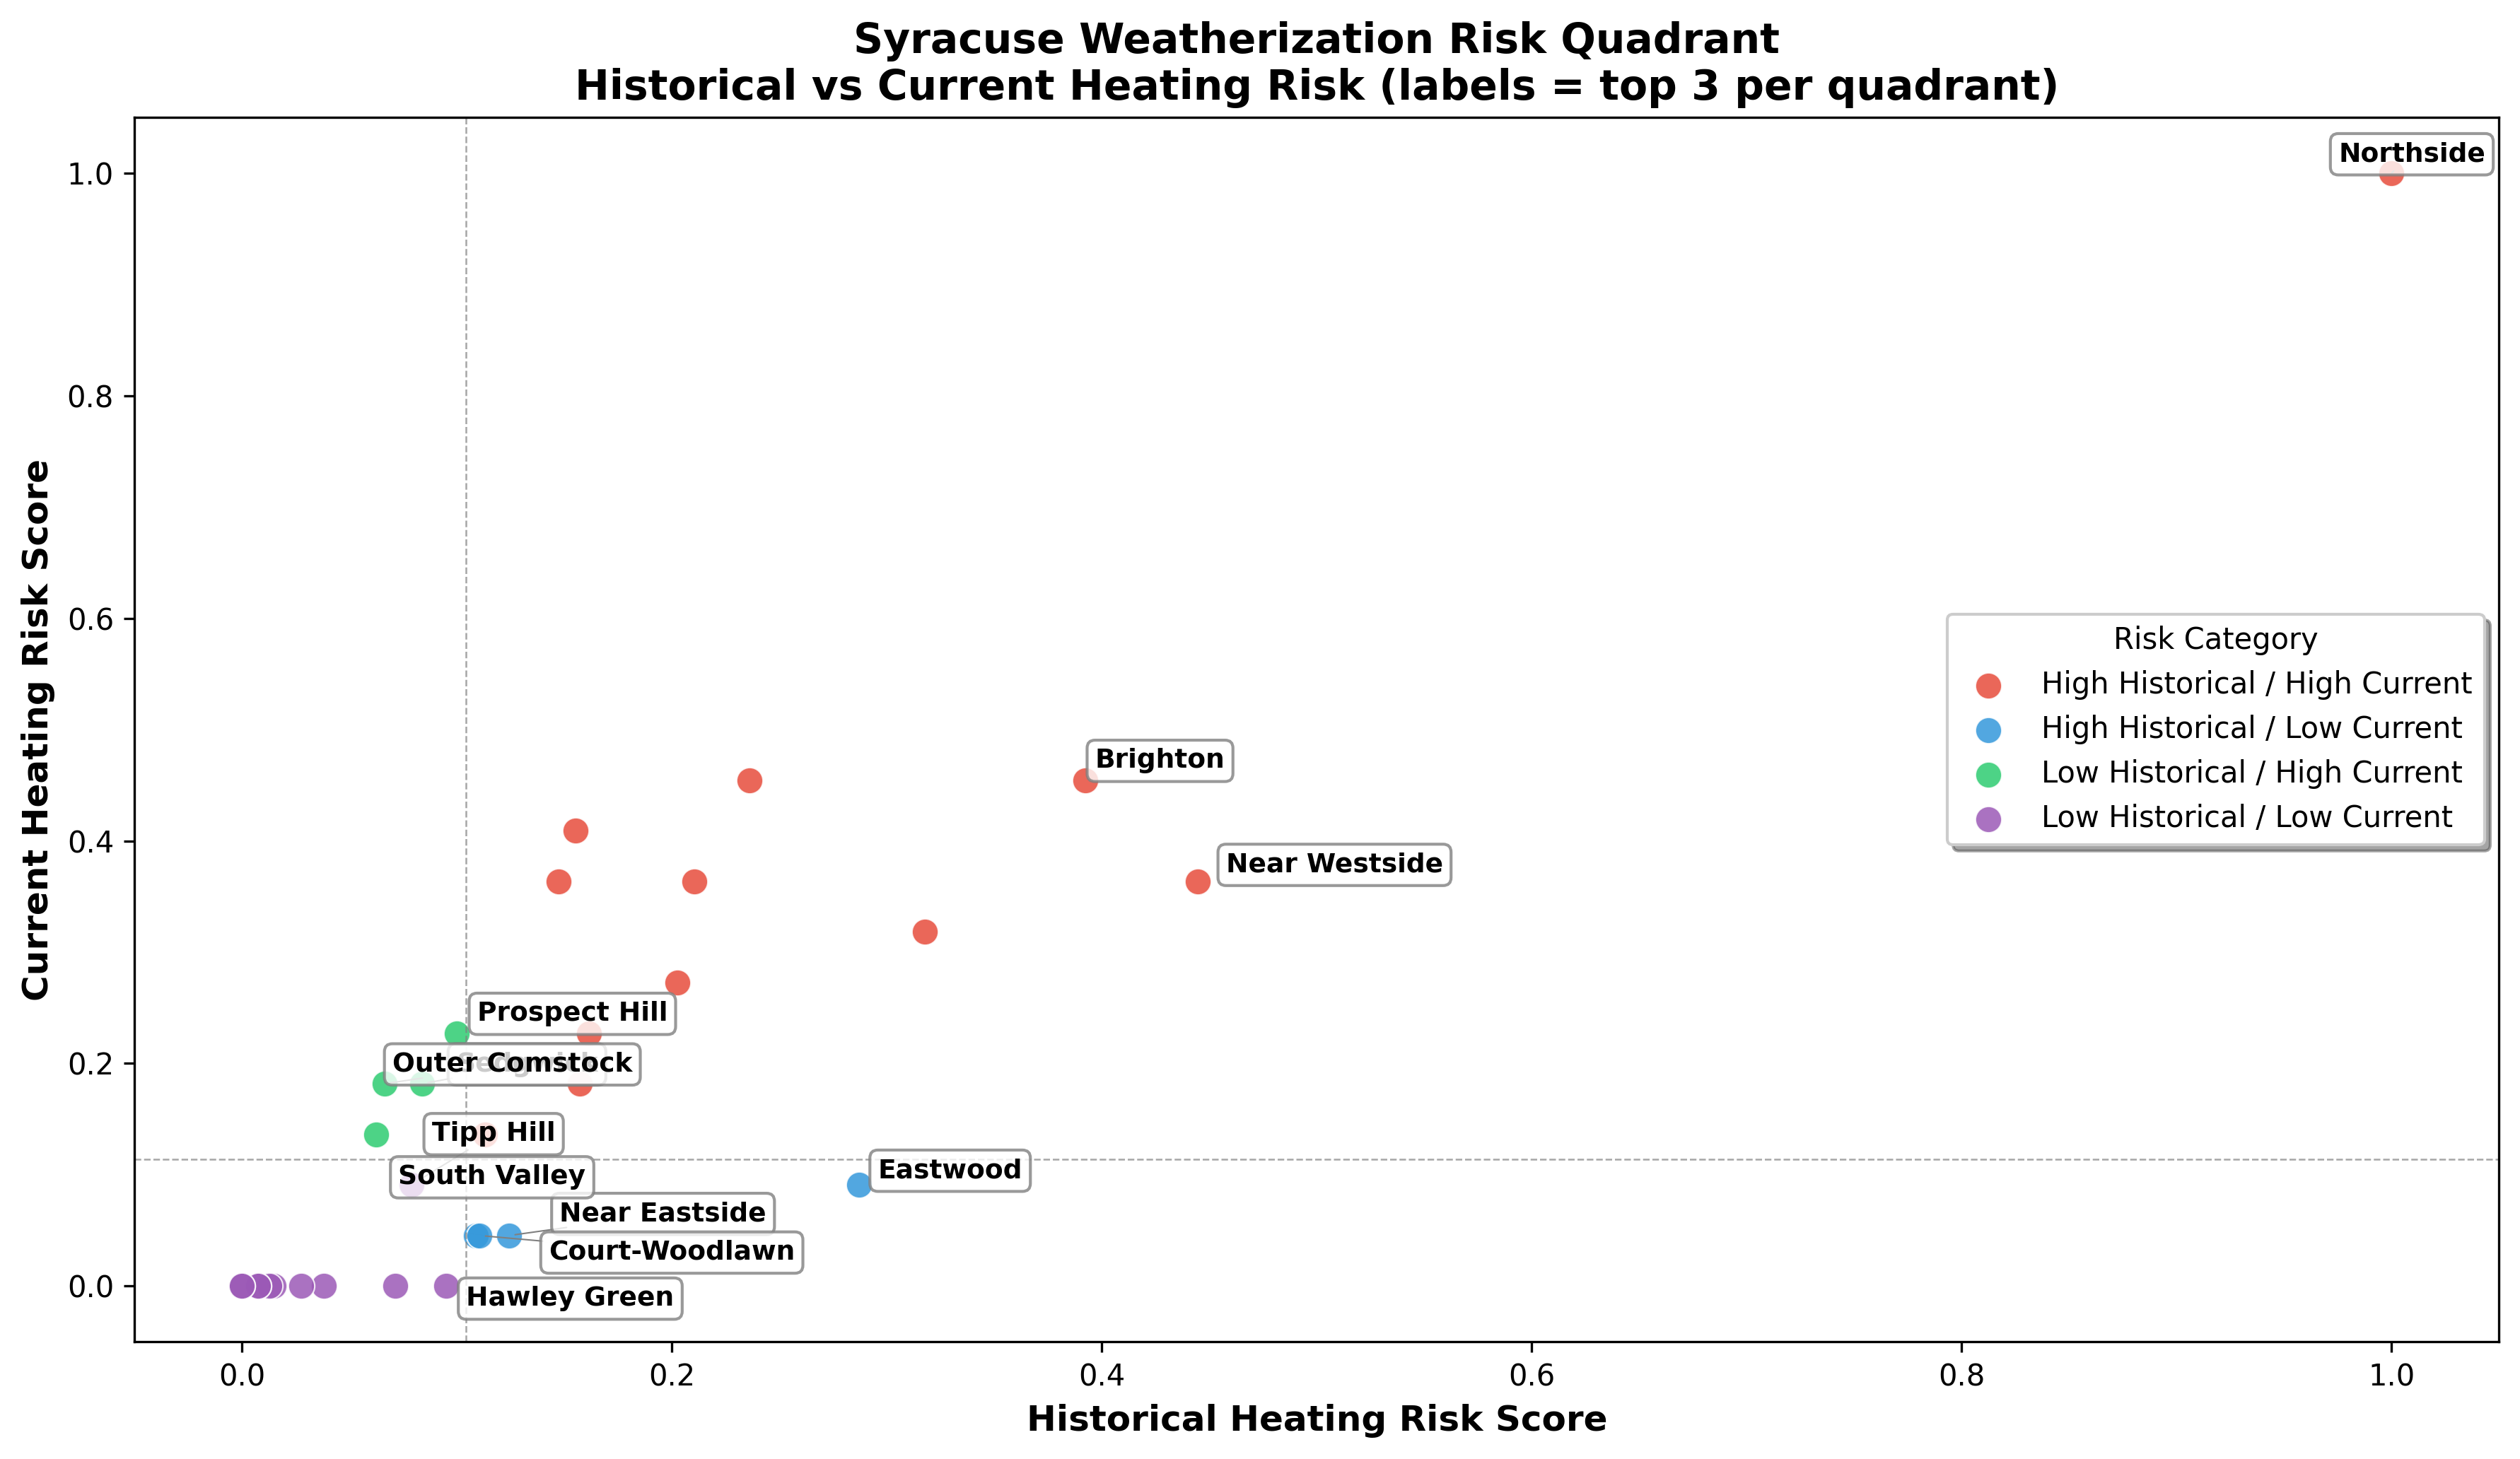

**Description:** This scatter plot maps all 34 Syracuse neighborhoods by their historical heating burden (x-axis) and current unresolved violations (y-axis). Neighborhoods in the upper-right quadrant (red) face both persistent historical problems and high current risk.

**Key Insights:**
- **Northside** is an extreme outlier - highest on both dimensions
- **Near Westside, Brighton, Washington Square** also show high historical + high current risk
- Most neighborhoods cluster in the low-risk quadrant (purple), indicating heating problems are concentrated in specific areas

---

### Visualization 2: Top 10 Neighborhoods by Total Heating Violations

*[Include: top10_heating_violations.png]*

![top10_heating_Violations.png](Open_Data_Project/Outputs/top10_heating_violations.png)

**Description:** Horizontal bar chart ranking neighborhoods by total heating violations (2017-2025).

**Key Insights:**
- Northside has 322 violations - 114% more than #2 ranked Near Westside (150 violations)
- Top 5 neighborhoods account for 60% of all heating violations
- Sharp drop-off after top 10 - remaining neighborhoods have <50 violations each

**Policy Implication:** A **targeted intervention strategy** focusing on the top 5-10 neighborhoods would address the majority of Syracuse's heating vulnerability.

---

### Visualization 3: Space Heating vs Water Heating Breakdown

*[Include: heating_types_breakdown.png]*

![heatign_types_breakdwon.png](Open_Data_Project/Outputs/heating_types_breakdown.png)

**Description:** Stacked horizontal bar chart showing the composition of heating violations by type for the top 10 neighborhoods.

**Key Insights:**
- Space heating (red) dominates in all neighborhoods, representing 85-90% of violations
- Water heating (blue) is relatively minor, suggesting it's a secondary issue
- Northside has the highest absolute counts of BOTH space and water heating problems

**Interpretation:** While we track water heating separately, **space heating system failures are the primary driver of winter vulnerability** across all high-risk neighborhoods.

---

### Visualization 4: Current Status - Open vs Closed Violations

**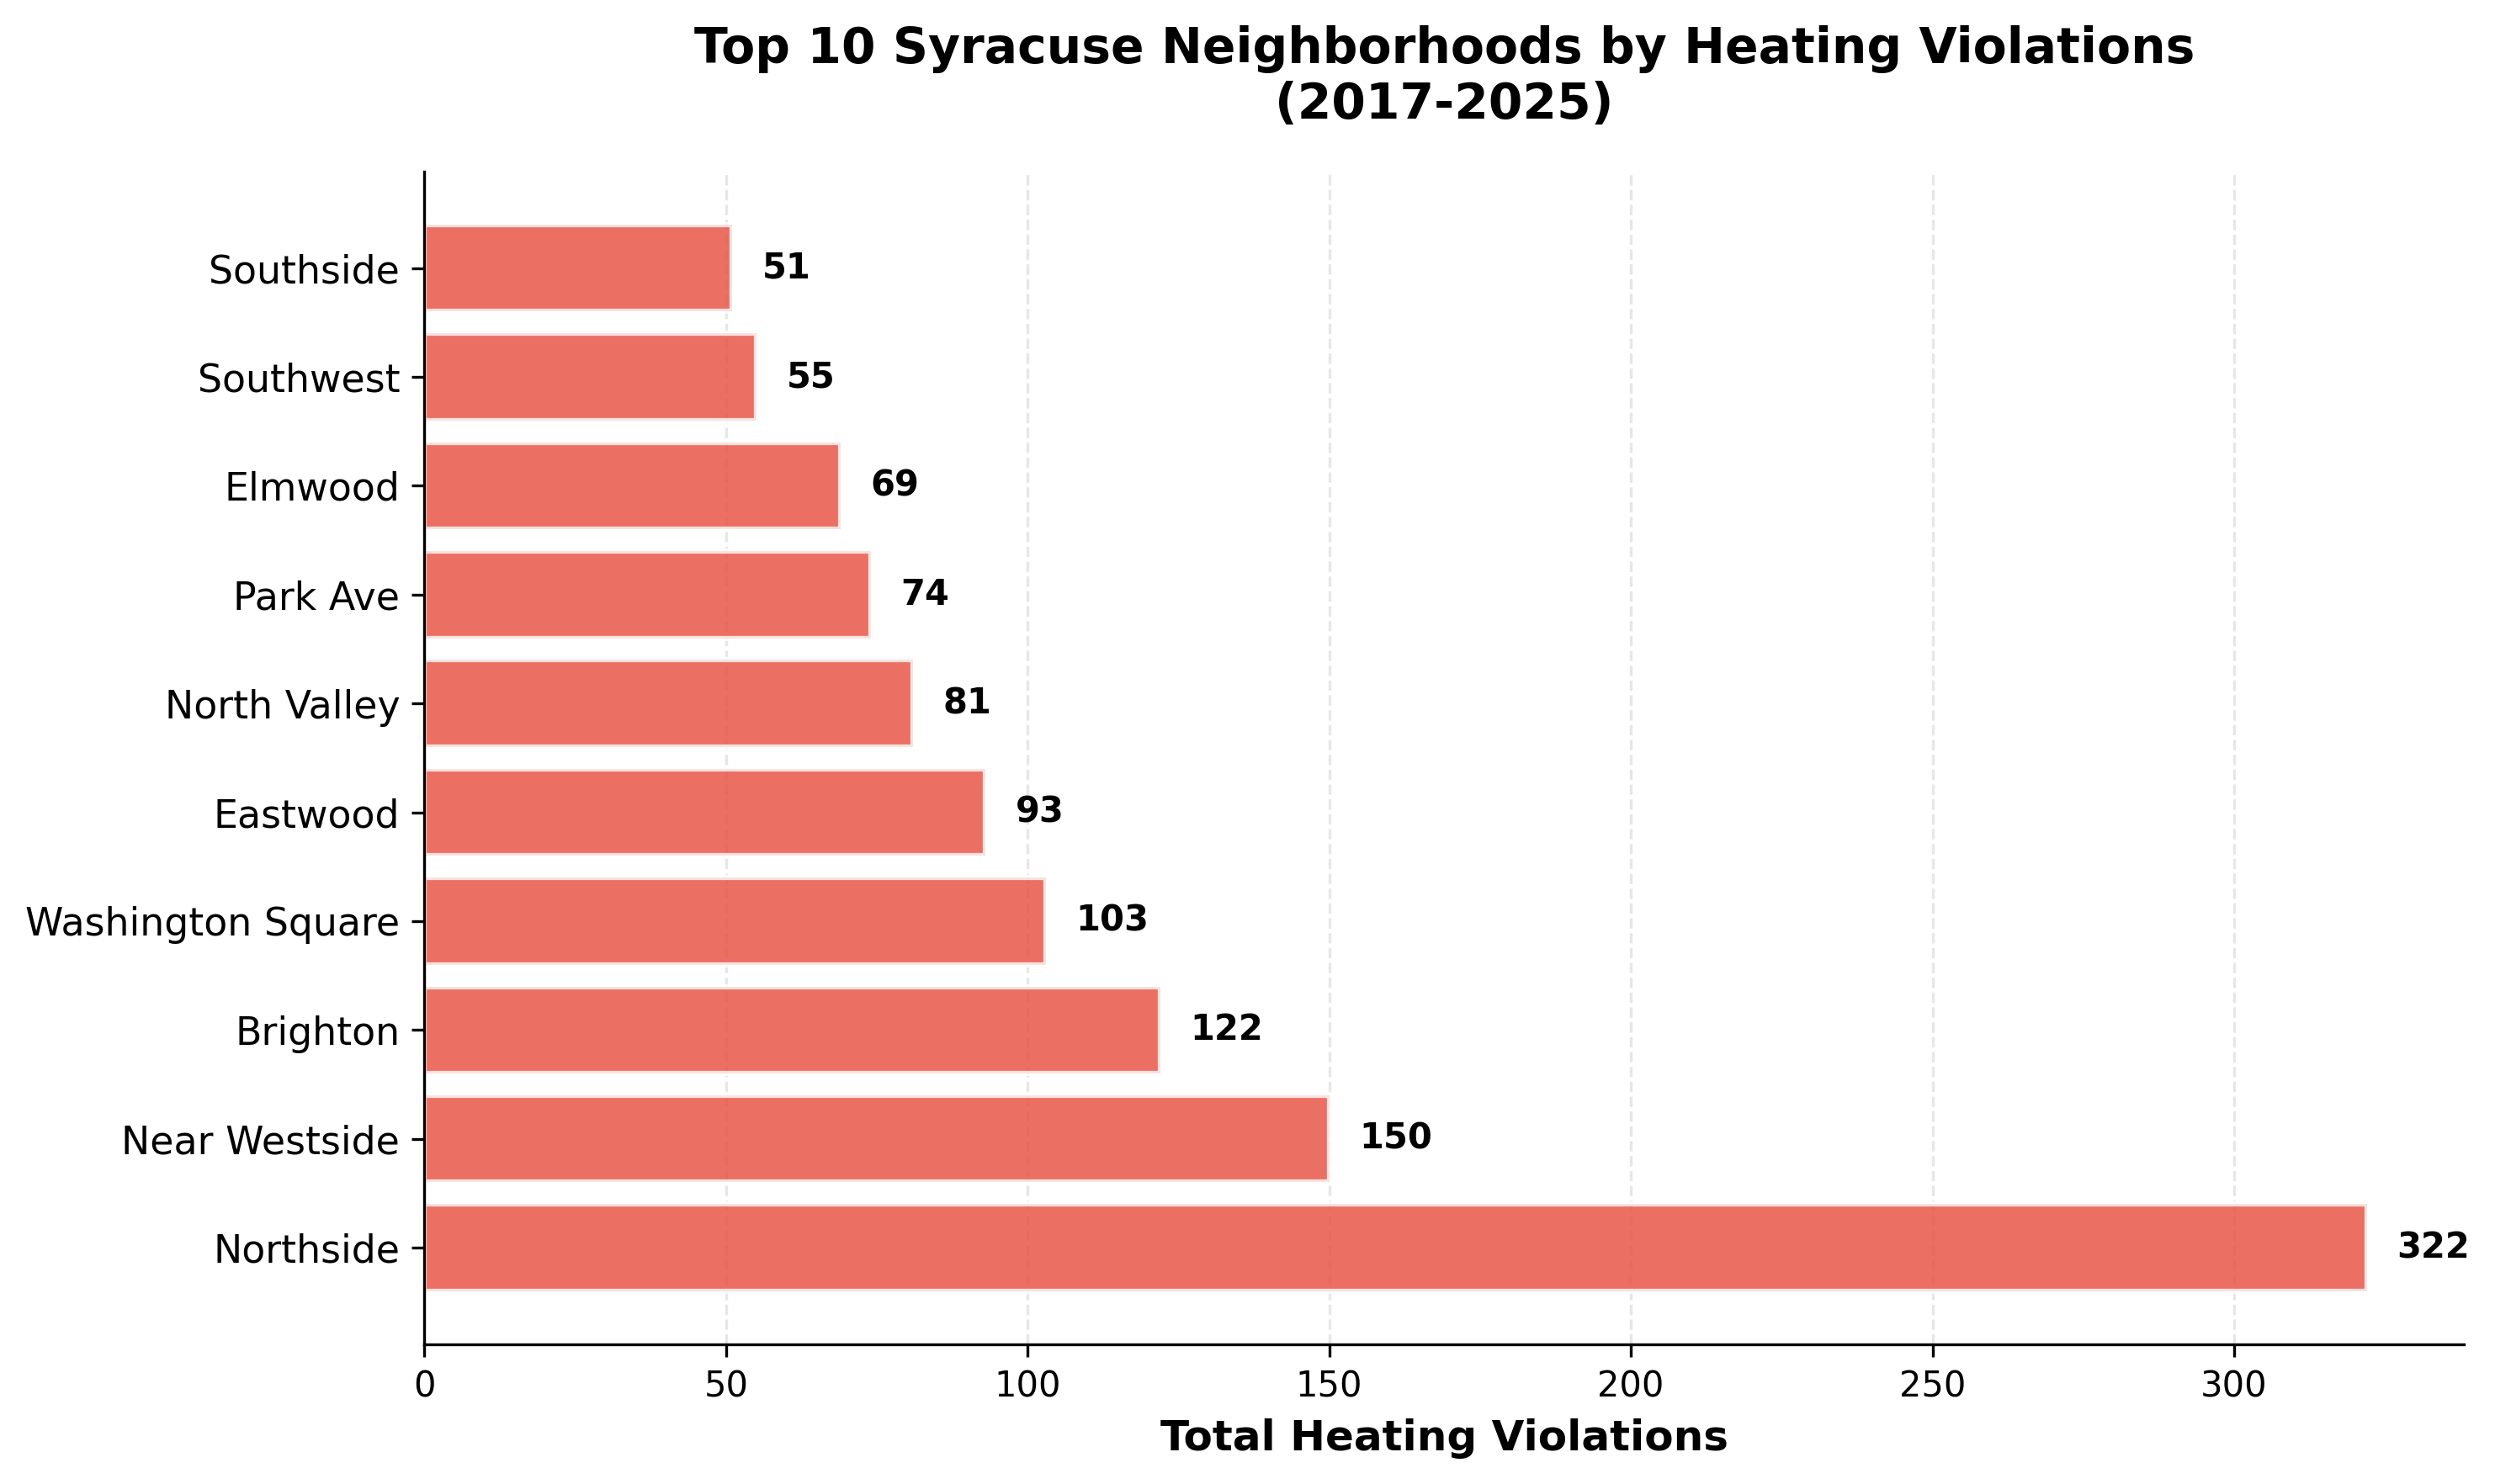



**Description:** Donut chart showing the proportion of open (unresolved) versus closed (resolved) heating violations citywide.

**Key Insights:**
- 68.2% of violations remain open (1,124 unresolved)
- Only 31.8% have been closed/resolved (523)
- This represents **over 1,000 properties currently experiencing heating problems**

**Critical Finding:** The high proportion of open violations indicates that **the problem is not historical - it is happening right now**. This urgency justifies immediate weatherization investment.

---

## Data Quality Summary: Code Violations

### Strengths:
- Large sample size (137,663 total violations)  
- Multi-year temporal coverage (2017-2025)  
- Detailed violation descriptions enable precise filtering  
- Geographic identifiers (neighborhood, SBL) support spatial analysis  
- Status tracking (open/closed) enables urgency assessment  

### Limitations:
- 0.89% of violations missing neighborhood assignments (labeled "Unknown")  
- 19.2% of violations missing dates (limits temporal trend analysis)  
- Violation descriptions are free text, requiring manual keyword classification  
- Data reflects code violations filed, not all heating problems (underreporting likely)  
- No direct measure of severity (all violations weighted equally)  

### Impact on Analysis:
The identified limitations do not prevent neighborhood-level risk assessment. Missing neighborhood data affects <1% of records. Missing dates affect temporal analysis but not spatial aggregation. The dataset is **fit for purpose** for identifying high-risk neighborhoods requiring weatherization intervention.

---

## Next Steps

With heating violation patterns established, the next phase of analysis will:

1. **Analyze Rental Registry data** to identify landlord non-compliance patterns
2. **Integrate Census data** to measure economic vulnerability (poverty, SNAP usage, income)
3. **Calculate housing age metrics** to identify neighborhoods with older, inefficient building stock
4. **Merge all datasets** to create a comprehensive Winter Vulnerability Index
5. **Develop neighborhood rankings** combining all four risk factors


